In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# for air gas constant (J/Kg/K)
R = 287
# Sea level temprature (Kelvin)
T0 = 288.16
# Sea level density (Kg/m3)
rho0 = 1.225
# Sea level Pressure (Pa)
P0 = 1.01325*pow(10,5)
# Sea level altitude (m)
H0 = 0
# Sea level gravitational acceleration (m/s2)
g0 = 9.81

In [3]:
H = np.linspace(0,84,84)
# rho = 1.2*np.exp(-2.9*pow(10,-5)*pow(H*1000,1.15))
T = np.zeros((len(H),1))
D = np.zeros((len(H),1))
P = np.zeros((len(H),1))

In [4]:
lamda = [-6.5,0.0,1.0,2.8,0.0,-2.8,-2.0]

In [5]:
def Atmosphere(H,T0 = T0,lamda = lamda[0],H0 = H0,rho0=rho0,P0 = P0):
    if lamda == 0:
        T = T0
        D = rho0*(np.exp(-g0*(H-H0)/(R*T)))
        P = (D/rho0)*P0
    else:
        T = T0 + lamda*(H - H0)
        pP = -g0/(lamda*R)
        pD = pP+1
        D = rho0*(pow(T/T0,pD))
        P = P0*(pow(T/T0,pP))
    return T,P,D

In [6]:
for h in range(0,len(H)):
    if h <= 11:
        [T[h],P[h],D[h]] = Atmosphere(H[h],T0=T0,lamda=lamda[0],H0=H0,rho0=rho0,P0 = P0)
    if (h > 11 and h <=20):
        [T[h],P[h],D[h]] = Atmosphere(H[h],T0=T[11],lamda=lamda[1],H0=H[11],rho0=D[11],P0 = P[11])
    if (h >20 and h <=32):
        [T[h],P[h],D[h]] = Atmosphere(H[h],T0=T[20],lamda=lamda[2],H0=H[20],rho0=D[20],P0 = P[20])
    if (h >32 and h <= 47):
        [T[h],P[h],D[h]] = Atmosphere(H[h],T0=T[32],lamda=lamda[3],H0=H[32],rho0=D[32],P0 = P[32])
    if (h > 47 and h <= 51):
        [T[h],P[h],D[h]] = Atmosphere(H[h],T0=T[47],lamda=lamda[4],H0=H[47],rho0=D[47],P0 = P[47])
    if (h > 51 and h <= 71):
        [T[h],P[h],D[h]] = Atmosphere(H[h],T0=T[51],lamda=lamda[5],H0=H[51],rho0=D[51],P0 = P[51])
    if (h > 71 and h <= 84):
        [T[h],P[h],D[h]] = Atmosphere(H[h],T0=T[71],lamda=lamda[6],H0=H[71],rho0=D[71],P0 = P[71])
    

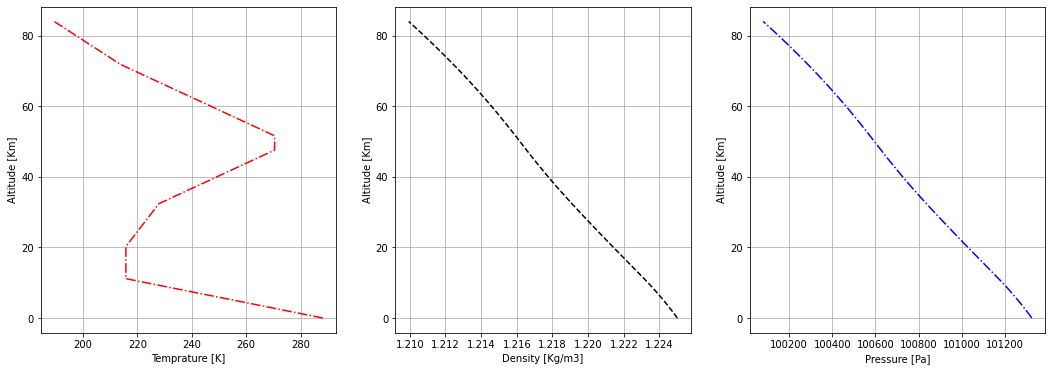

In [7]:
plt.figure(figsize=(18,6));
plt.subplot(1,3,1);
plt.plot(T,H,"-.r");plt.grid();plt.xlabel("Temprature [K]");plt.ylabel("Altitude [Km]");
plt.subplot(1,3,2);
plt.plot(D,H,"--k");plt.grid();plt.xlabel("Density [Kg/m3]");plt.ylabel("Altitude [Km]");
plt.subplot(1,3,3);
plt.plot(P,H,"-.b");plt.grid();plt.xlabel("Pressure [Pa]");plt.ylabel("Altitude [Km]");